In [2]:
import numpy as np
import sympy as sp

def calculate_gradient_1():
    """Calculate the gradient of the function u = xy + y^2 + 5"""
    x, y = sp.symbols('x y')
    u = x*y + y**2 + 5
    
    # Calculate partial derivatives
    du_dx = sp.diff(u, x)
    du_dy = sp.diff(u, y)
    
    print("Gradient of the function u = xy + y^2 + 5:")
    print(f"∂u/∂x = {du_dx}")
    print(f"∂u/∂y = {du_dy}")
    print(f"Gradient ∇u = ({du_dx}, {du_dy})")
    
def calculate_gradient_2():
    """Calculate the gradient of the function u = ln(sqrt(x^2 + y^2 + z^2)) at the point (1, 2, -2)"""
    x, y, z = sp.symbols('x y z')
    u = sp.log(sp.sqrt(x**2 + y**2 + z**2))
    
    # Calculate partial derivatives
    du_dx = sp.diff(u, x)
    du_dy = sp.diff(u, y)
    du_dz = sp.diff(u, z)
    
    # Calculate the gradient at the point (1, 2, -2)
    point = {x: 1, y: 2, z: -2}
    grad_x_value = du_dx.subs(point)
    grad_y_value = du_dy.subs(point)
    grad_z_value = du_dz.subs(point)
    
    # Calculate the length of the vector
    vector_length = sp.sqrt(x**2 + y**2 + z**2).subs(point)
    
    print("\nGradient of the function u = ln(sqrt(x^2 + y^2 + z^2)) at the point (1, 2, -2):")
    print(f"∂u/∂x at (1, 2, -2) = {grad_x_value}")
    print(f"∂u/∂y at (1, 2, -2) = {grad_y_value}")
    print(f"∂u/∂z at (1, 2, -2) = {grad_z_value}")
    print(f"Gradient ∇u at (1, 2, -2) = ({grad_x_value}, {grad_y_value}, {grad_z_value})")
    
    # Numerical results (converted to float)
    print("\nNumerical results:")
    print(f"∇u at (1, 2, -2) = ({float(grad_x_value)}, {float(grad_y_value)}, {float(grad_z_value)})")

if __name__ == "__main__":
    calculate_gradient_1()
    calculate_gradient_2()

Gradient of the function u = xy + y^2 + 5:
∂u/∂x = y
∂u/∂y = x + 2*y
Gradient ∇u = (y, x + 2*y)

Gradient of the function u = ln(sqrt(x^2 + y^2 + z^2)) at the point (1, 2, -2):
∂u/∂x at (1, 2, -2) = 1/9
∂u/∂y at (1, 2, -2) = 2/9
∂u/∂z at (1, 2, -2) = -2/9
Gradient ∇u at (1, 2, -2) = (1/9, 2/9, -2/9)

Numerical results:
∇u at (1, 2, -2) = (0.1111111111111111, 0.2222222222222222, -0.2222222222222222)


Dataset:
    Season After 8:00     Wind Sleep in
0   spring         no   breeze      yes
1   winter         no  no wind      yes
2   autumn        yes   breeze      yes
3   winter         no  no wind      yes
4   summer         no   breeze      yes
5   winter        yes   breeze      yes
6   winter         no     gale      yes
7   winter         no  no wind      yes
8   spring        yes  no wind       no
9   summer        yes     gale       no
10  summer         no     gale       no
11  autumn        yes   breeze      yes


Calculate information entropy of dataset:
Ent(D) = -0.75*log2(0.75) - 0.25*log2(0.25) = 0.8113

Calculate Node 1 splitting:

a=Season:
  Season = autumn:
    Samples: 2, yes: 2, no: 0
    Entropy = -(2/2)log2(2/2) = 0.0000
  Season = spring:
    Samples: 2, yes: 1, no: 1
    Entropy = -(1/2)log2(1/2) - (1/2)log2(1/2) = 1.0000
  Season = summer:
    Samples: 3, yes: 1, no: 2
    Entropy = -(1/3)log2(1/3) - (2/3)log2(2/3) = 0.9183
  Season = winter:
    Samples: 5, y

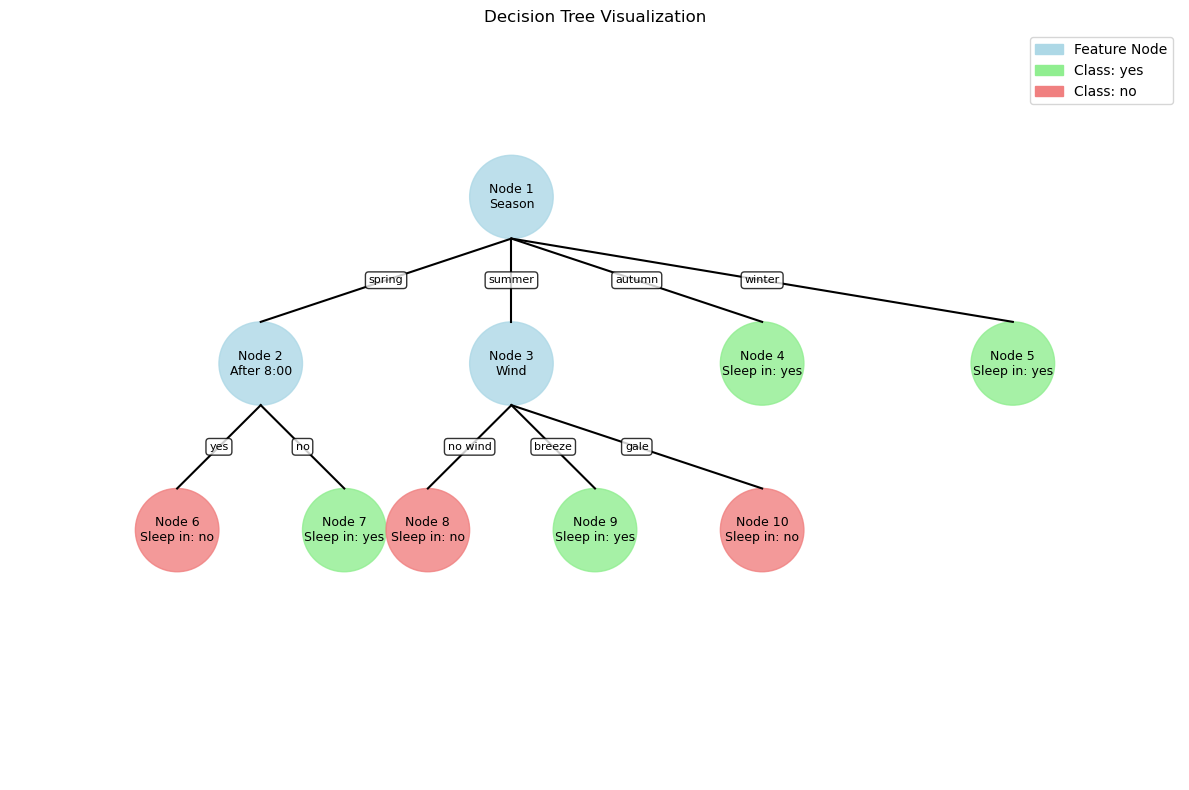

In [9]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Calculate information entropy
def calculate_entropy(data_labels):
    """Calculate information entropy
    Args:
        data_labels: List of sample labels
    Returns:
        entropy: Information entropy
    """
    # Get unique values and counts of labels
    unique_labels, counts = np.unique(data_labels, return_counts=True)
    # Calculate probabilities
    probabilities = counts / len(data_labels)
    # Calculate entropy
    entropy = 0
    for p in probabilities:
        entropy -= p * math.log2(p) if p > 0 else 0
    return entropy

# Calculate conditional entropy of a feature
def calculate_conditional_entropy(feature_values, labels):
    """Calculate conditional entropy
    Args:
        feature_values: List of feature values
        labels: Corresponding list of labels
    Returns:
        conditional_entropy: Conditional entropy
    """
    # Get unique feature values
    unique_values = np.unique(feature_values)
    conditional_entropy = 0
    
    # Calculate entropy for each feature value, weighted sum
    for value in unique_values:
        # Get indices of samples with current feature value
        indices = np.where(feature_values == value)[0]
        # Proportion of samples with current feature value
        proportion = len(indices) / len(labels)
        # Labels corresponding to current feature value
        subset_labels = [labels[i] for i in indices]
        # Calculate entropy for current feature value
        entropy = calculate_entropy(subset_labels)
        # Weighted sum
        conditional_entropy += proportion * entropy
        
    return conditional_entropy

# Calculate information gain
def calculate_gain(feature_values, labels):
    """Calculate information gain
    Args:
        feature_values: List of feature values
        labels: Corresponding list of labels
    Returns:
        gain: Information gain
    """
    # Calculate information entropy of dataset
    entropy = calculate_entropy(labels)
    # Calculate conditional entropy
    conditional_entropy = calculate_conditional_entropy(feature_values, labels)
    # Calculate information gain
    gain = entropy - conditional_entropy
    return gain, conditional_entropy

def process_data():
    """Process data, build decision tree as required"""
    # Create dataset
    data = {
        'Season': ['spring', 'winter', 'autumn', 'winter', 'summer', 'winter', 'winter', 'winter', 'spring', 'summer', 'summer', 'autumn'],
        'After 8:00': ['no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes'],
        'Wind': ['breeze', 'no wind', 'breeze', 'no wind', 'breeze', 'breeze', 'gale', 'no wind', 'no wind', 'gale', 'gale', 'breeze'],
        'Sleep in': ['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes']
    }
    
    # Convert to DataFrame for easier operations
    df = pd.DataFrame(data)
    
    # Print dataset
    print("Dataset:")
    print(df)
    print("\n")
    
    # Extract labels
    labels = df['Sleep in'].values
    
    # Calculate information entropy of dataset
    dataset_entropy = calculate_entropy(labels)
    print(f"Calculate information entropy of dataset:")
    print(f"Ent(D) = -{9/12}*log2({9/12}) - {3/12}*log2({3/12}) = {dataset_entropy:.4f}")
    
    # Calculate information gain for each feature, select best splitting feature
    feature_names = ['Season', 'After 8:00', 'Wind']
    gains = []
    conditional_entropies = []
    
    # Node 1 splitting calculation
    print("\nCalculate Node 1 splitting:")
    
    # Season feature
    season_values = df['Season'].values
    season_gain, season_conditional_entropy = calculate_gain(season_values, labels)
    gains.append(season_gain)
    conditional_entropies.append(season_conditional_entropy)
    
    # Detailed calculation process for Season
    print("\na=Season:")
    
    # Get unique values and counts for Season
    unique_seasons, season_counts = np.unique(season_values, return_counts=True)
    season_details = []
    
    for i, season in enumerate(unique_seasons):
        indices = np.where(season_values == season)[0]
        subset_labels = [labels[j] for j in indices]
        yes_count = subset_labels.count('yes')
        no_count = subset_labels.count('no')
        total = len(subset_labels)
        
        # Calculate entropy for current feature value
        if total > 0:
            if yes_count == total or no_count == total:  # Pure node
                entropy = 0
            else:
                p_yes = yes_count / total
                p_no = no_count / total
                entropy = -p_yes * math.log2(p_yes) - p_no * math.log2(p_no)
        else:
            entropy = 0
            
        season_details.append({
            'value': season,
            'count': total,
            'yes_count': yes_count,
            'no_count': no_count,
            'entropy': entropy
        })
        
        # Print calculation process
        print(f"  Season = {season}:")
        print(f"    Samples: {total}, yes: {yes_count}, no: {no_count}")
        if total > 0:
            if yes_count == total:
                print(f"    Entropy = -({yes_count}/{total})log2({yes_count}/{total}) = {entropy:.4f}")
            elif no_count == total:
                print(f"    Entropy = -({no_count}/{total})log2({no_count}/{total}) = {entropy:.4f}")
            else:
                print(f"    Entropy = -({yes_count}/{total})log2({yes_count}/{total}) - ({no_count}/{total})log2({no_count}/{total}) = {entropy:.4f}")
        else:
            print(f"    Entropy = 0")
    
    # Calculate conditional entropy
    season_conditional_entropy_calculation = ""
    for detail in season_details:
        value = detail['value']
        count = detail['count']
        entropy = detail['entropy']
        season_conditional_entropy_calculation += f"({count}/12) * {entropy:.4f} + "
    
    season_conditional_entropy_calculation = season_conditional_entropy_calculation.rstrip(" + ")
    print(f"\n  Conditional Entropy = {season_conditional_entropy_calculation} = {season_conditional_entropy:.4f}")
    print(f"  Information Gain = {dataset_entropy:.4f} - {season_conditional_entropy:.4f} = {season_gain:.4f}")
    
    # After 8:00 feature
    after_8_values = df['After 8:00'].values
    after_8_gain, after_8_conditional_entropy = calculate_gain(after_8_values, labels)
    gains.append(after_8_gain)
    conditional_entropies.append(after_8_conditional_entropy)
    
    # Detailed calculation process for After 8:00
    print("\na=After 8:00:")
    
    # Get unique values and counts for After 8:00
    unique_after_8, after_8_counts = np.unique(after_8_values, return_counts=True)
    after_8_details = []
    
    for i, after_8 in enumerate(unique_after_8):
        indices = np.where(after_8_values == after_8)[0]
        subset_labels = [labels[j] for j in indices]
        yes_count = subset_labels.count('yes')
        no_count = subset_labels.count('no')
        total = len(subset_labels)
        
        # Calculate entropy for current feature value
        if total > 0:
            if yes_count == total or no_count == total:  # Pure node
                entropy = 0
            else:
                p_yes = yes_count / total
                p_no = no_count / total
                entropy = -p_yes * math.log2(p_yes) - p_no * math.log2(p_no)
        else:
            entropy = 0
            
        after_8_details.append({
            'value': after_8,
            'count': total,
            'yes_count': yes_count,
            'no_count': no_count,
            'entropy': entropy
        })
        
        # Print calculation process
        print(f"  After 8:00 = {after_8}:")
        print(f"    Samples: {total}, yes: {yes_count}, no: {no_count}")
        if total > 0:
            if yes_count == total:
                print(f"    Entropy = -({yes_count}/{total})log2({yes_count}/{total}) = {entropy:.4f}")
            elif no_count == total:
                print(f"    Entropy = -({no_count}/{total})log2({no_count}/{total}) = {entropy:.4f}")
            else:
                print(f"    Entropy = -({yes_count}/{total})log2({yes_count}/{total}) - ({no_count}/{total})log2({no_count}/{total}) = {entropy:.4f}")
        else:
            print(f"    Entropy = 0")
    
    # Calculate conditional entropy
    after_8_conditional_entropy_calculation = ""
    for detail in after_8_details:
        value = detail['value']
        count = detail['count']
        entropy = detail['entropy']
        after_8_conditional_entropy_calculation += f"({count}/12) * {entropy:.4f} + "
    
    after_8_conditional_entropy_calculation = after_8_conditional_entropy_calculation.rstrip(" + ")
    print(f"\n  Conditional Entropy = {after_8_conditional_entropy_calculation} = {after_8_conditional_entropy:.4f}")
    print(f"  Information Gain = {dataset_entropy:.4f} - {after_8_conditional_entropy:.4f} = {after_8_gain:.4f}")
    
    # Wind feature
    wind_values = df['Wind'].values
    wind_gain, wind_conditional_entropy = calculate_gain(wind_values, labels)
    gains.append(wind_gain)
    conditional_entropies.append(wind_conditional_entropy)
    
    # Detailed calculation process for Wind
    print("\na=Wind:")
    
    # Get unique values and counts for Wind
    unique_winds, wind_counts = np.unique(wind_values, return_counts=True)
    wind_details = []
    
    for i, wind in enumerate(unique_winds):
        indices = np.where(wind_values == wind)[0]
        subset_labels = [labels[j] for j in indices]
        yes_count = subset_labels.count('yes')
        no_count = subset_labels.count('no')
        total = len(subset_labels)
        
        # Calculate entropy for current feature value
        if total > 0:
            if yes_count == total or no_count == total:  # Pure node
                entropy = 0
            else:
                p_yes = yes_count / total
                p_no = no_count / total
                entropy = -p_yes * math.log2(p_yes) - p_no * math.log2(p_no)
        else:
            entropy = 0
            
        wind_details.append({
            'value': wind,
            'count': total,
            'yes_count': yes_count,
            'no_count': no_count,
            'entropy': entropy
        })
        
        # Print calculation process
        print(f"  Wind = {wind}:")
        print(f"    Samples: {total}, yes: {yes_count}, no: {no_count}")
        if total > 0:
            if yes_count == total:
                print(f"    Entropy = -({yes_count}/{total})log2({yes_count}/{total}) = {entropy:.4f}")
            elif no_count == total:
                print(f"    Entropy = -({no_count}/{total})log2({no_count}/{total}) = {entropy:.4f}")
            else:
                print(f"    Entropy = -({yes_count}/{total})log2({yes_count}/{total}) - ({no_count}/{total})log2({no_count}/{total}) = {entropy:.4f}")
        else:
            print(f"    Entropy = 0")
    
    # Calculate conditional entropy
    wind_conditional_entropy_calculation = ""
    for detail in wind_details:
        value = detail['value']
        count = detail['count']
        entropy = detail['entropy']
        wind_conditional_entropy_calculation += f"({count}/12) * {entropy:.4f} + "
    
    wind_conditional_entropy_calculation = wind_conditional_entropy_calculation.rstrip(" + ")
    print(f"\n  Conditional Entropy = {wind_conditional_entropy_calculation} = {wind_conditional_entropy:.4f}")
    print(f"  Information Gain = {dataset_entropy:.4f} - {wind_conditional_entropy:.4f} = {wind_gain:.4f}")
    
    # Select best splitting feature
    best_feature_idx = np.argmax(gains)
    best_feature = feature_names[best_feature_idx]
    best_gain = gains[best_feature_idx]
    
    print(f"\nBest splitting feature: {best_feature}, Information Gain: {best_gain:.4f}")
    
    # Split dataset based on best feature
    split_data = {}
    for value in np.unique(df[best_feature]):
        split_df = df[df[best_feature] == value]
        split_data[value] = split_df
    
    # Print child nodes after splitting
    print("\nChild nodes after splitting:")
    for value, subset in split_data.items():
        print(f"Node {best_feature} = {value}:")
        print(subset[['Season', 'After 8:00', 'Wind', 'Sleep in']])
        print()
    
    # Calculate information gain for spring node (Node 2)
    if 'spring' in split_data:
        spring_df = split_data['spring']
        spring_labels = spring_df['Sleep in'].values
        spring_entropy = calculate_entropy(spring_labels)
        
        print("\nCalculate Node 2 (Season = spring) splitting:")
        print(f"Ent(D) = {spring_entropy:.4f}")
        
        # Calculate information gain for each feature in spring subset
        spring_feature_names = ['After 8:00', 'Wind']
        spring_gains = []
        spring_conditional_entropies = []
        
        for feature in spring_feature_names:
            feature_values = spring_df[feature].values
            gain, cond_entropy = calculate_gain(feature_values, spring_labels)
            spring_gains.append(gain)
            spring_conditional_entropies.append(cond_entropy)
            
            print(f"\na={feature}:")
            print(f"  Conditional Entropy = {cond_entropy:.4f}")
            print(f"  Information Gain = {spring_entropy:.4f} - {cond_entropy:.4f} = {gain:.4f}")
        
        best_spring_feature_idx = np.argmax(spring_gains)
        best_spring_feature = spring_feature_names[best_spring_feature_idx]
        best_spring_gain = spring_gains[best_spring_feature_idx]
        
        print(f"\nBest splitting feature for Node 2: {best_spring_feature}, Information Gain: {best_spring_gain:.4f}")
    
    # Calculate information gain for summer node (Node 3)
    if 'summer' in split_data:
        summer_df = split_data['summer']
        summer_labels = summer_df['Sleep in'].values
        summer_entropy = calculate_entropy(summer_labels)
        
        print("\nCalculate Node 3 (Season = summer) splitting:")
        print(f"Ent(D) = {summer_entropy:.4f}")
        
        # Calculate information gain for each feature in summer subset
        summer_feature_names = ['After 8:00', 'Wind']
        summer_gains = []
        summer_conditional_entropies = []
        
        for feature in summer_feature_names:
            feature_values = summer_df[feature].values
            gain, cond_entropy = calculate_gain(feature_values, summer_labels)
            summer_gains.append(gain)
            summer_conditional_entropies.append(cond_entropy)
            
            print(f"\na={feature}:")
            print(f"  Conditional Entropy = {cond_entropy:.4f}")
            print(f"  Information Gain = {summer_entropy:.4f} - {cond_entropy:.4f} = {gain:.4f}")
        
        best_summer_feature_idx = np.argmax(summer_gains)
        best_summer_feature = summer_feature_names[best_summer_feature_idx]
        best_summer_gain = summer_gains[best_summer_feature_idx]
        
        print(f"\nBest splitting feature for Node 3: {best_summer_feature}, Information Gain: {best_summer_gain:.4f}")
    
    # Draw final decision tree
    plot_decision_tree()

def plot_decision_tree():
    """Draw the final decision tree"""
    plt.figure(figsize=(12, 8))
    ax = plt.gca()
    ax.set_axis_off()
    
    # Create simple node objects for drawing
    class Node:
        def __init__(self, id, feature=None, is_leaf=False, label=None):
            self.id = id
            self.feature = feature
            self.is_leaf = is_leaf
            self.label = label
            self.children = {}
            
    # Manually create decision tree structure based on reference answer
    root = Node(1, feature="Season")
    
    node2 = Node(2, feature="After 8:00")
    node3 = Node(3, feature="Wind")
    node4 = Node(4, is_leaf=True, label="yes")
    node5 = Node(5, is_leaf=True, label="yes")
    
    node6 = Node(6, is_leaf=True, label="no")
    node7 = Node(7, is_leaf=True, label="yes")
    
    node8 = Node(8, is_leaf=True, label="no")
    node9 = Node(9, is_leaf=True, label="yes")
    node10 = Node(10, is_leaf=True, label="no")
    
    # Build relationships between nodes
    root.children["spring"] = node2
    root.children["summer"] = node3
    root.children["autumn"] = node4
    root.children["winter"] = node5
    
    node2.children["yes"] = node6
    node2.children["no"] = node7
    
    node3.children["no wind"] = node8
    node3.children["breeze"] = node9
    node3.children["gale"] = node10
    
    # Node positions
    node_positions = {
        1: (6, 7),
        2: (3, 5),
        3: (6, 5),
        4: (9, 5),
        5: (12, 5),
        6: (2, 3),
        7: (4, 3),
        8: (5, 3),
        9: (7, 3),
        10: (9, 3)
    }
    
    # Draw nodes and connections
    def draw_node(node, pos):
        x, y = pos
        
        # Set node style
        if node.is_leaf:
            color = 'lightgreen' if node.label == 'yes' else 'lightcoral'
            node_text = f"Node {node.id}\nSleep in: {node.label}"
        else:
            color = 'lightblue'
            node_text = f"Node {node.id}\n{node.feature}"
        
        # Draw node
        circle = plt.Circle((x, y), 0.5, fill=True, color=color, alpha=0.8)
        ax.add_patch(circle)
        ax.text(x, y, node_text, ha='center', va='center', fontsize=9)
        
        # Draw child nodes and edges
        for value, child in node.children.items():
            child_x, child_y = node_positions[child.id]
            
            # Draw edge
            ax.plot([x, child_x], [y - 0.5, child_y + 0.5], 'k-')
            
            # Add feature value text on edge
            mid_x = (x + child_x) / 2
            mid_y = (y - 0.5 + child_y + 0.5) / 2
            ax.text(mid_x, mid_y, str(value), ha='center', va='center', 
                   bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8), fontsize=8)
    
    # Start drawing from root node
    for node_id, pos in node_positions.items():
        if node_id == 1:
            draw_node(root, pos)
        elif node_id == 2:
            draw_node(node2, pos)
        elif node_id == 3:
            draw_node(node3, pos)
        elif node_id == 4:
            draw_node(node4, pos)
        elif node_id == 5:
            draw_node(node5, pos)
        elif node_id == 6:
            draw_node(node6, pos)
        elif node_id == 7:
            draw_node(node7, pos)
        elif node_id == 8:
            draw_node(node8, pos)
        elif node_id == 9:
            draw_node(node9, pos)
        elif node_id == 10:
            draw_node(node10, pos)
    
    # Add legend
    legend_patches = [
        mpatches.Patch(color='lightblue', label='Feature Node'),
        mpatches.Patch(color='lightgreen', label='Class: yes'),
        mpatches.Patch(color='lightcoral', label='Class: no')
    ]
    plt.legend(handles=legend_patches, loc='upper right')
    
    plt.title('Decision Tree Visualization')
    plt.xlim(0, 14)
    plt.ylim(0, 9)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    process_data() 

In [ ]:
import numpy as np
import pandas as pd
from fractions import Fraction

def naive_bayes_calculation():
    # Create dataset
    data = {
        'x1': [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3],
        'x2': ['S', 'M', 'M', 'S', 'S', 'S', 'M', 'M', 'L', 'L', 'L', 'M', 'M', 'L', 'L'],
        'y': [-1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1]
    }
    
    df = pd.DataFrame(data)
    
    # New data point
    new_x = (2, 'S')
    
    # 1. Calculate prior probabilities P(y=-1) and P(y=1)
    total_samples = len(df)
    negative_samples = len(df[df['y'] == -1])
    positive_samples = len(df[df['y'] == 1])
    
    p_y_neg = negative_samples / total_samples
    p_y_pos = positive_samples / total_samples
    
    # Express as fractions
    p_y_neg_fraction = Fraction(negative_samples, total_samples)
    p_y_pos_fraction = Fraction(positive_samples, total_samples)
    
    print("Step 1: Calculate Prior Probabilities")
    print(f"P(y=-1) = {negative_samples}/{total_samples} = {p_y_neg_fraction} = {p_y_neg:.4f}")
    print(f"P(y=1) = {positive_samples}/{total_samples} = {p_y_pos_fraction} = {p_y_pos:.4f}")
    print("\n")
    
    # 2. Calculate conditional probabilities
    # 2.1 Calculate P(x1=2|y=-1)
    x1_neg_count = len(df[(df['y'] == -1) & (df['x1'] == new_x[0])])
    p_x1_given_y_neg = x1_neg_count / negative_samples
    p_x1_given_y_neg_fraction = Fraction(x1_neg_count, negative_samples)
    
    # 2.2 Calculate P(x1=2|y=1)
    x1_pos_count = len(df[(df['y'] == 1) & (df['x1'] == new_x[0])])
    p_x1_given_y_pos = x1_pos_count / positive_samples
    p_x1_given_y_pos_fraction = Fraction(x1_pos_count, positive_samples)
    
    # 2.3 Calculate P(x2=S|y=-1)
    x2_neg_count = len(df[(df['y'] == -1) & (df['x2'] == new_x[1])])
    p_x2_given_y_neg = x2_neg_count / negative_samples
    p_x2_given_y_neg_fraction = Fraction(x2_neg_count, negative_samples)
    
    # 2.4 Calculate P(x2=S|y=1)
    x2_pos_count = len(df[(df['y'] == 1) & (df['x2'] == new_x[1])])
    p_x2_given_y_pos = x2_pos_count / positive_samples
    p_x2_given_y_pos_fraction = Fraction(x2_pos_count, positive_samples)
    
    print("Step 2: Calculate Conditional Probabilities")
    print(f"P(x1={new_x[0]}|y=-1) = P(x1={new_x[0]},y=-1)/P(y=-1) = ({x1_neg_count}/{total_samples})/({negative_samples}/{total_samples}) = {x1_neg_count}/{negative_samples} = {p_x1_given_y_neg_fraction} = {p_x1_given_y_neg:.4f}")
    print(f"P(x1={new_x[0]}|y=1) = P(x1={new_x[0]},y=1)/P(y=1) = ({x1_pos_count}/{total_samples})/({positive_samples}/{total_samples}) = {x1_pos_count}/{positive_samples} = {p_x1_given_y_pos_fraction} = {p_x1_given_y_pos:.4f}")
    print(f"P(x2={new_x[1]}|y=-1) = P(x2={new_x[1]},y=-1)/P(y=-1) = ({x2_neg_count}/{total_samples})/({negative_samples}/{total_samples}) = {x2_neg_count}/{negative_samples} = {p_x2_given_y_neg_fraction} = {p_x2_given_y_neg:.4f}")
    print(f"P(x2={new_x[1]}|y=1) = P(x2={new_x[1]},y=1)/P(y=1) = ({x2_pos_count}/{total_samples})/({positive_samples}/{total_samples}) = {x2_pos_count}/{positive_samples} = {p_x2_given_y_pos_fraction} = {p_x2_given_y_pos:.4f}")
    print("\n")
    
    # 3. Calculate the posterior probabilities
    p_y_neg_given_x_numerator = p_y_neg * p_x1_given_y_neg * p_x2_given_y_neg
    p_y_pos_given_x_numerator = p_y_pos * p_x1_given_y_pos * p_x2_given_y_pos
    
    # Calculate the denominator (evidence)
    p_x = p_y_neg_given_x_numerator + p_y_pos_given_x_numerator
    
    # Calculate full posterior probabilities
    p_y_neg_given_x = p_y_neg_given_x_numerator / p_x
    p_y_pos_given_x = p_y_pos_given_x_numerator / p_x
    
    # Express as fractions
    p_y_neg_given_x_fraction_numerator = p_y_neg_fraction * p_x1_given_y_neg_fraction * p_x2_given_y_neg_fraction
    p_y_pos_given_x_fraction_numerator = p_y_pos_fraction * p_x1_given_y_pos_fraction * p_x2_given_y_pos_fraction
    p_x_fraction = p_y_neg_given_x_fraction_numerator + p_y_pos_given_x_fraction_numerator
    
    p_y_neg_given_x_fraction = p_y_neg_given_x_fraction_numerator / p_x_fraction
    p_y_pos_given_x_fraction = p_y_pos_given_x_fraction_numerator / p_x_fraction
    
    print("Step 3: Calculate Posterior Probabilities")
    print("Numerator part:")
    print(f"P(y=-1) × P(x1={new_x[0]}|y=-1) × P(x2={new_x[1]}|y=-1) = {p_y_neg_fraction} × {p_x1_given_y_neg_fraction} × {p_x2_given_y_neg_fraction} = {p_y_neg_given_x_fraction_numerator} = {p_y_neg_given_x_numerator:.6f}")
    print(f"P(y=1) × P(x1={new_x[0]}|y=1) × P(x2={new_x[1]}|y=1) = {p_y_pos_fraction} × {p_x1_given_y_pos_fraction} × {p_x2_given_y_pos_fraction} = {p_y_pos_given_x_fraction_numerator} = {p_y_pos_given_x_numerator:.6f}")
    
    print("\nDenominator part (Evidence):")
    print(f"P(x) = {p_y_neg_given_x_fraction_numerator} + {p_y_pos_given_x_fraction_numerator} = {p_x_fraction} = {p_x:.6f}")
    
    print("\nComplete posterior probabilities:")
    print(f"P(y=-1|x) = {p_y_neg_given_x_fraction_numerator}/{p_x_fraction} = {p_y_neg_given_x_fraction} = {p_y_neg_given_x:.6f}")
    print(f"P(y=1|x) = {p_y_pos_given_x_fraction_numerator}/{p_x_fraction} = {p_y_pos_given_x_fraction} = {p_y_pos_given_x:.6f}")
    print("\n")
    
    # 4. Compare posterior probabilities and predict result
    if p_y_neg_given_x > p_y_pos_given_x:
        prediction = -1
    else:
        prediction = 1
    
    print("Step 4: Compare Posterior Probabilities and Predict Result")
    if p_y_neg_given_x > p_y_pos_given_x:
        print(f"P(y=-1|x) > P(y=1|x)")
        print(f"{p_y_neg_given_x_fraction} > {p_y_pos_given_x_fraction}")
        print(f"{p_y_neg_given_x:.6f} > {p_y_pos_given_x:.6f}")
    else:
        print(f"P(y=-1|x) < P(y=1|x)")
        print(f"{p_y_neg_given_x_fraction} < {p_y_pos_given_x_fraction}")
        print(f"{p_y_neg_given_x:.6f} < {p_y_pos_given_x:.6f}")
    
    print(f"\nSince {('P(y=-1|x) > P(y=1|x)' if p_y_neg_given_x > p_y_pos_given_x else 'P(y=-1|x) < P(y=1|x)')}, the predicted result is y = {prediction}")
    
    # 5. Summary
    print("\nSummary:")
    print(f"For the new data point x = {new_x}, the Naive Bayes method predicts y = {prediction}")
    
    return prediction

if __name__ == "__main__":
    naive_bayes_calculation() 

d:\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


步骤 1: 计算先验概率
P(y=-1) = 5/15 = 1/3 = 0.3333
P(y=1) = 10/15 = 2/3 = 0.6667


步骤 2: 计算条件概率
P(x1=2|y=-1) = P(x1=2,y=-1)/P(y=-1) = (1/15)/(5/15) = 1/5 = 1/5 = 0.2000
P(x1=2|y=1) = P(x1=2,y=1)/P(y=1) = (4/15)/(10/15) = 4/10 = 2/5 = 0.4000
P(x2=S|y=-1) = P(x2=S,y=-1)/P(y=-1) = (3/15)/(5/15) = 3/5 = 3/5 = 0.6000
P(x2=S|y=1) = P(x2=S,y=1)/P(y=1) = (1/15)/(10/15) = 1/10 = 1/10 = 0.1000


步骤 3: 计算后验概率
分子部分:
P(y=-1) × P(x1=2|y=-1) × P(x2=S|y=-1) = 1/3 × 1/5 × 3/5 = 1/25 = 0.040000
P(y=1) × P(x1=2|y=1) × P(x2=S|y=1) = 2/3 × 2/5 × 1/10 = 2/75 = 0.026667

分母部分 (证据):
P(x) = 1/25 + 2/75 = 1/15 = 0.066667

完整后验概率:
P(y=-1|x) = 1/25/1/15 = 3/5 = 0.600000
P(y=1|x) = 2/75/1/15 = 2/5 = 0.400000


步骤 4: 比较后验概率并预测结果
P(y=-1|x) > P(y=1|x)
3/5 > 2/5
0.600000 > 0.400000

由于 P(y=-1|x) > P(y=1|x), 预测结果为 y = -1

总结:
对于新数据点 x = (2, 'S'), 朴素贝叶斯方法预测 y = -1
